In [1]:
import os
import json
import pandas as pd
from collections.abc import MutableMapping
import numpy as np

In [2]:
def flatten_dict(d: MutableMapping, sep: str= '.') -> MutableMapping:
    """Flatten a given nested python dict and return a dict"""
    [flat_dict] = pd.json_normalize(d, sep=sep).to_dict(orient='records')
    return flat_dict

In [3]:
def read_data(results_path):
    all_files = os.listdir(results_path)
    print('Reading results from this path {}'.format(results_path))

    all_data = []
    # read from file
    for filec in all_files:
        filepath = os.path.join(results_path, filec)
        with open(filepath, 'r', encoding='utf-8') as fileo:
            data = json.load(fileo)
        all_data.append(data)

    # parse to dictionary
    all_data_dict = {}
    for repo_data in all_data:
        datat = flatten_dict(repo_data)
        repo_results = datat.pop('results')
        for test_res in repo_results:
            test_results = flatten_dict(test_res)
            test_id = test_results['id']
            for key, val in test_results.items():
                datat[key + '_id{}'.format(test_id)] = val
        # request.normalized_object_identifier not always there
        datat['request.normalized_object_identifier'] = datat.get('request.normalized_object_identifier', None)
        # append to table
        for key, val in datat.items():
            temp = all_data_dict.get(key, [])
            temp.append(val)
            all_data_dict[key] = temp

    df = pd.DataFrame(data=all_data_dict)
    return df

In [4]:
results_path = './results/fair_ease'
keys_dict = {"metric_tests.FRSM-13-R1-1.metric_test_status_id13": "FRSM-13-R1-1",
             "metric_tests.FRSM-13-R1-2.metric_test_status_id13": "FRSM-13-R1-2",
             "metric_tests.FRSM-15-R1.1-1.metric_test_status_id15": "FRSM-15-R1.1-1",
             "metric_tests.FRSM-15-R1.1-2.metric_test_status_id15": "FRSM-15-R1.1-2",
             "metric_tests.FRSM-15-R1.1-3.metric_test_status_id15": "FRSM-15-R1.1-3"
            }
df_fe = read_data(results_path)
df_fe = df_fe[["resolved_url"]+list(keys_dict.keys())].rename(columns=keys_dict).set_index("resolved_url")

Reading results from this path ./results/fair_ease


In [5]:
df_fe

,FRSM-13-R1-1,FRSM-13-R1-2,FRSM-15-R1.1-1,FRSM-15-R1.1-2,FRSM-15-R1.1-3
resolved_url,,,,,
https://github.com/HCBScienceProducts/CANYON-B,fail,fail,pass,fail,pass
https://github.com/ESSI-Lab/DAB,pass,fail,pass,fail,pass
https://github.com/gher-uliege/DIVAnd.jl,fail,fail,pass,fail,pass
https://github.com/Geomatys/examind-community,pass,fail,pass,fail,fail


In [10]:
df_fe.to_csv("analysis_fair_ease.csv")

<Axes: xlabel='count'>

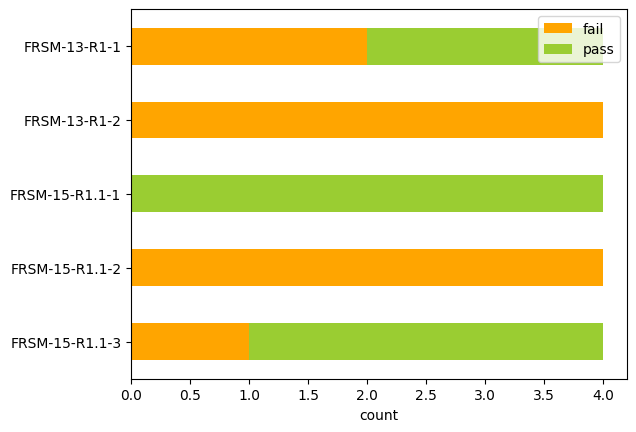

In [6]:
df_fe.apply(lambda x: x.value_counts()).T.sort_index(ascending=False).plot(
    kind="barh",
    stacked=True,
    color={"fail": "orange", "pass": "yellowgreen"},
    xlabel="count"
    )

In [7]:
results_path = './results/cessda'
keys_dict = {"metric_tests.FRSM-13-R1-CESSDA-1.metric_test_status_id13": "FRSM-13-R1-CESSDA-1",
             "metric_tests.FRSM-13-R1-CESSDA-2.metric_test_status_id13": "FRSM-13-R1-CESSDA-2",
             "metric_tests.FRSM-13-R1-CESSDA-3.metric_test_status_id13": "FRSM-13-R1-CESSDA-3",
             "metric_tests.FRSM-15-R1.1-CESSDA-1.metric_test_status_id15": "FRSM-15-R1.1-CESSDA-1",
             "metric_tests.FRSM-15-R1.1-CESSDA-2.metric_test_status_id15": "FRSM-15-R1.1-CESSDA-2",
             "metric_tests.FRSM-15-R1.1-CESSDA-3.metric_test_status_id15": "FRSM-15-R1.1-CESSDA-3"
            }
df_c = read_data(results_path)
df_c = df_c[["resolved_url"]+list(keys_dict.keys())].rename(columns=keys_dict).set_index("resolved_url")

Reading results from this path ./results/cessda


In [8]:
df_c

,FRSM-13-R1-CESSDA-1,FRSM-13-R1-CESSDA-2,FRSM-13-R1-CESSDA-3,FRSM-15-R1.1-CESSDA-1,FRSM-15-R1.1-CESSDA-2,FRSM-15-R1.1-CESSDA-3
resolved_url,,,,,,
https://github.com/cessda/cessda.cvs.contentguide,fail,fail,fail,pass,fail,fail
https://github.com/cessda/cessda.metadata.profiles,fail,fail,fail,pass,fail,fail
https://github.com/cessda/cessda.cdc.versions,fail,fail,fail,pass,fail,fail
https://github.com/cessda/cessda.cafe.waiter,fail,pass,pass,pass,fail,fail
https://github.com/cessda/maintenance.notification,fail,fail,fail,fail,fail,fail
https://github.com/cessda/cessda.cdc.aggregator.oai-pmh-repo-handler,fail,fail,pass,pass,fail,fail
https://github.com/cessda/cessda.cafe.coffee.carsten,fail,fail,fail,pass,fail,fail
https://github.com/cessda/cessda.cdc.aggregator.doc-store,fail,fail,pass,pass,fail,fail
https://github.com/cessda/cessda.documentation.theme,fail,fail,fail,pass,fail,fail


<Axes: xlabel='count'>

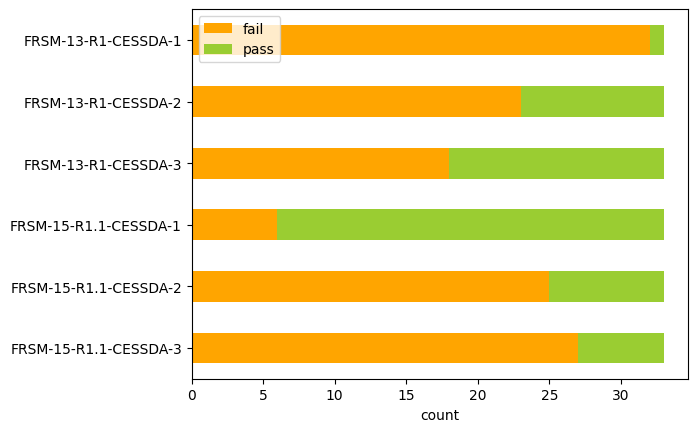

In [9]:
df_c.apply(lambda x: x.value_counts()).T.sort_index(ascending=False).plot(
    kind="barh",
    stacked=True,
    color={"fail": "orange", "pass": "yellowgreen"},
    xlabel="count"
    )

In [ ]:
df_c.to_csv("analysis_cessda.csv")